In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Read data into dataframe

In [38]:
df = pd.read_csv('C://Users//vkhumalo//Downloads//OSVer.csv')
df.head()

,Name,Enabled,DNSHostName,DistinguishedName,System,LastLogonDate,Laps,LapsExpirationDays,LapsExpirationTime
0,SRASRV-DC1,True,SRASRV-DC1.sra.org.sz,"CN=SRASRV-DC1,OU=Domain Controllers,DC=sra,DC=...",Windows Server 2008 R2 Enterprise,2022/10/31 02:47,False,NaN,NaN
1,SRASRV-DC2,True,SRASRV-DC2.sra.org.sz,"CN=SRASRV-DC2,OU=Domain Controllers,DC=sra,DC=...",Windows Server 2012 R2 Standard,2022/10/26 09:50,False,NaN,NaN
2,SRASRV-DC01,True,SRASRV-DC01.sra.org.sz,"CN=SRASRV-DC01,OU=Domain Controllers,DC=sra,DC...",Windows Server 2016 Standard,2022/10/30 06:51,False,NaN,NaN
3,SRASRV-DRM1,True,SRASRV-DRM1.sra.org.sz,"CN=SRASRV-DRM1,OU=HQ,OU=Servers,DC=sra,DC=org,...",Windows Server 2012 R2 Standard,2022/11/03 17:28,False,NaN,NaN
4,SRASRV-BAK1,True,srasrv-bak1.sra.org.sz,"CN=SRASRV-BAK1,OU=HQ,OU=Servers,DC=sra,DC=org,...",Windows Server 2019 Standard,2021/12/01 22:27,False,NaN,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                742 non-null    object 
 1   Enabled             742 non-null    bool   
 2   DNSHostName         739 non-null    object 
 3   DistinguishedName   742 non-null    object 
 4   System              742 non-null    object 
 5   LastLogonDate       739 non-null    object 
 6   Laps                742 non-null    bool   
 7   LapsExpirationDays  531 non-null    float64
 8   LapsExpirationTime  531 non-null    object 
dtypes: bool(2), float64(1), object(6)
memory usage: 42.2+ KB


In [40]:
# Drop servers by Name
servers_only = df[df['Name'].str.contains('SRASRV')]
servers_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                78 non-null     object 
 1   Enabled             78 non-null     bool   
 2   DNSHostName         78 non-null     object 
 3   DistinguishedName   78 non-null     object 
 4   System              78 non-null     object 
 5   LastLogonDate       78 non-null     object 
 6   Laps                78 non-null     bool   
 7   LapsExpirationDays  0 non-null      float64
 8   LapsExpirationTime  0 non-null      object 
dtypes: bool(2), float64(1), object(6)
memory usage: 5.0+ KB


In [41]:
servers_dropped = df[~df['Name'].str.contains('SRASRV')]
servers_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 21 to 741
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                664 non-null    object 
 1   Enabled             664 non-null    bool   
 2   DNSHostName         661 non-null    object 
 3   DistinguishedName   664 non-null    object 
 4   System              664 non-null    object 
 5   LastLogonDate       661 non-null    object 
 6   Laps                664 non-null    bool   
 7   LapsExpirationDays  531 non-null    float64
 8   LapsExpirationTime  531 non-null    object 
dtypes: bool(2), float64(1), object(6)
memory usage: 42.8+ KB


In [42]:
# Check Equipments with Unknown OS Type
srv =servers_dropped[servers_dropped['System'].str.contains('Unknown')]
srv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 85 to 709
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                26 non-null     object 
 1   Enabled             26 non-null     bool   
 2   DNSHostName         23 non-null     object 
 3   DistinguishedName   26 non-null     object 
 4   System              26 non-null     object 
 5   LastLogonDate       23 non-null     object 
 6   Laps                26 non-null     bool   
 7   LapsExpirationDays  23 non-null     float64
 8   LapsExpirationTime  23 non-null     object 
dtypes: bool(2), float64(1), object(6)
memory usage: 1.7+ KB


In [44]:
# Drop Equipments with Unknown OS Type
unknown_dropped = servers_dropped[~servers_dropped['System'].str.contains('Unknown')]
unknown_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 21 to 741
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                638 non-null    object 
 1   Enabled             638 non-null    bool   
 2   DNSHostName         638 non-null    object 
 3   DistinguishedName   638 non-null    object 
 4   System              638 non-null    object 
 5   LastLogonDate       638 non-null    object 
 6   Laps                638 non-null    bool   
 7   LapsExpirationDays  508 non-null    float64
 8   LapsExpirationTime  508 non-null    object 
dtypes: bool(2), float64(1), object(6)
memory usage: 41.1+ KB


In [50]:
# Drop Equipments with Windows Server OS Type 
dropped_server = unknown_dropped[~unknown_dropped['System'].str.contains('Windows Server')]
dropped_server.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 21 to 740
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                614 non-null    object 
 1   Enabled             614 non-null    bool   
 2   DNSHostName         614 non-null    object 
 3   DistinguishedName   614 non-null    object 
 4   System              614 non-null    object 
 5   LastLogonDate       614 non-null    object 
 6   Laps                614 non-null    bool   
 7   LapsExpirationDays  508 non-null    float64
 8   LapsExpirationTime  508 non-null    object 
dtypes: bool(2), float64(1), object(6)
memory usage: 39.6+ KB


In [75]:
# Group by System
grouped_df = dropped_server.groupby('System').nunique()
grouped_df

,Name,Enabled,DNSHostName,DistinguishedName,LastLogonDate,Laps,LapsExpirationDays,LapsExpirationTime
System,,,,,,,,
Windows 10 1703,1,1,1,1,1,1,0,0
Windows 10 1809,1,1,1,1,1,1,0,0
Windows 10 1903,7,1,7,7,7,2,6,6
Windows 10 1909,17,1,17,17,17,2,4,4
Windows 10 2004,30,2,30,30,30,2,13,17
Windows 10 20H2,140,1,140,140,123,2,33,114
Windows 10 21H1,101,1,101,101,99,2,21,89
Windows 10 21H2,242,1,242,242,228,2,38,202
Windows 11,74,2,74,74,71,2,22,68


In [82]:
Name_df = dropped_server.groupby('System')['Name'].nunique()
Name_df

System
Windows 10 1703      1
Windows 10 1809      1
Windows 10 1903      7
Windows 10 1909     17
Windows 10 2004     30
Windows 10 20H2    140
Windows 10 21H1    101
Windows 10 21H2    242
Windows 11          74
Windows 8.1 Pro      1
Name: Name, dtype: int64

In [ ]:
# Get Count of each System Type

In [83]:
count_1703 = dropped_server[dropped_server['System'] == 'Windows 10 1703'].count()['System']
count_1703

1

In [84]:
count_1809 = dropped_server[dropped_server['System'] == 'Windows 10 1809'].count()['System']
count_1809

1

In [85]:
count_1903 = dropped_server[dropped_server['System'] == 'Windows 10 1903'].count()['System']
count_1903

7

In [86]:
count_1909 = dropped_server[dropped_server['System'] == 'Windows 10 1909'].count()['System']
count_1909

17

In [87]:
count_2004 = dropped_server[dropped_server['System'] == 'Windows 10 2004'].count()['System']
count_2004

30

In [88]:
count_20H2 = dropped_server[dropped_server['System'] == 'Windows 10 20H2'].count()['System']
count_20H2

140

In [89]:
count_21H1 = dropped_server[dropped_server['System'] == 'Windows 10 21H1'].count()['System']
count_21H1

101

In [90]:
count_21H2 = dropped_server[dropped_server['System'] == 'Windows 10 21H2'].count()['System']
count_21H2

242

In [91]:
count_11 = dropped_server[dropped_server['System'] == 'Windows 11'].count()['System']
count_11

74

In [92]:
count_Pro  = dropped_server[dropped_server['System'] == 'Windows 8.1 Pro'].count()['System']
count_Pro 

1

In [10]:
total = count_Pro

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                742 non-null    object 
 1   Enabled             742 non-null    bool   
 2   DNSHostName         739 non-null    object 
 3   DistinguishedName   742 non-null    object 
 4   System              742 non-null    object 
 5   LastLogonDate       739 non-null    object 
 6   Laps                742 non-null    bool   
 7   LapsExpirationDays  531 non-null    float64
 8   LapsExpirationTime  531 non-null    object 
dtypes: bool(2), float64(1), object(6)
memory usage: 42.2+ KB


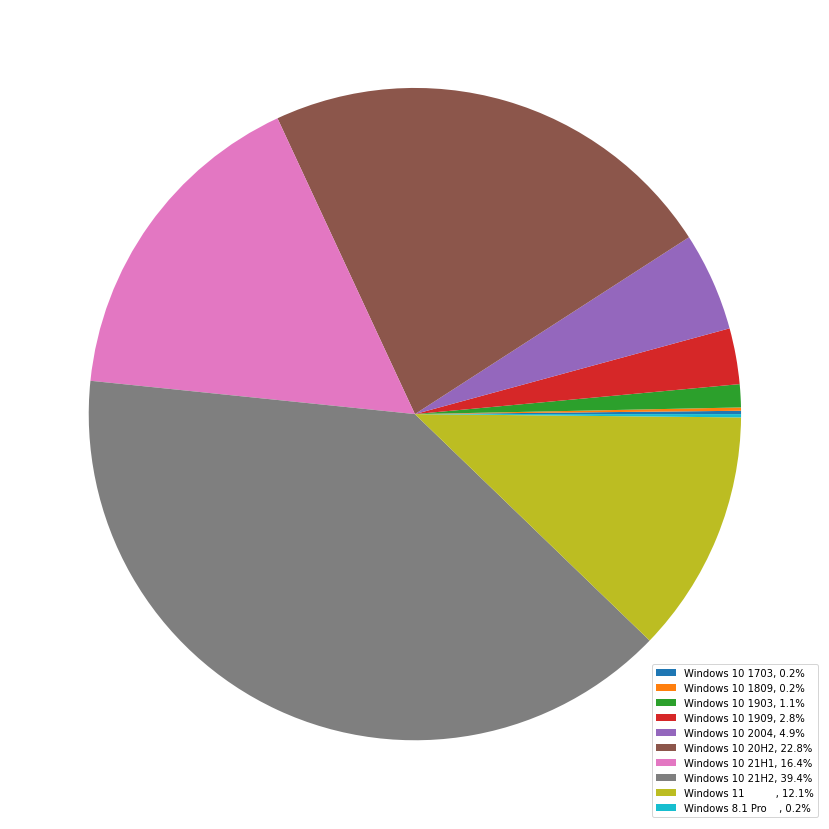

In [125]:
# Plot Pie Chart
y = np.array([count_1703,count_1809,count_1903,count_1909,count_2004,count_20H2,count_21H1,count_21H2,count_11,count_Pro])
mylabels = ['Windows 10 1703', 'Windows 10 1809', 'Windows 10 1903', 'Windows 10 1909', 'Windows 10 2004', 'Windows 10 20H2','Windows 10 21H1','Windows 10 21H2','Windows 11          ','Windows 8.1 Pro    ']
plt.figure(figsize=(15,15))
j = []
for i in y:
    j.append(i/614 * 100)   
labels = [f'{l}, {s:0.1f}%' for l, s in zip(mylabels, j)]
plt.pie(y)
plt.legend(labels)
plt.savefig("figure200.png")
plt.show() 



    

<Figure size 432x288 with 0 Axes>